# FAKE NEWS DETECTION USING NPL AND GloVe

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import itertools


IMPORTING THE DATASET

In [2]:
true = pd.read_csv("./True.csv")
false = pd.read_csv("./Fake.csv")

DATA VISUALIZATION AND PREPROCESSING

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Making a new header in dataset for true and false news
true['category'] = 1
false['category'] = 0

In [6]:
# Merging the 2 dataset
df = pd.concat([true, false])

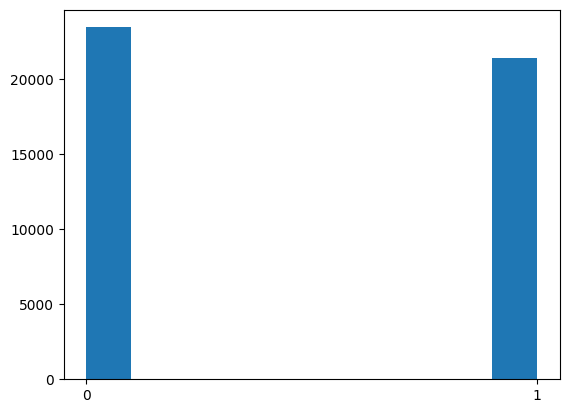

In [7]:
plt.hist(df.category)
plt.xticks([0, 1])
plt.show()

In [8]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
# checking for nan values
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [10]:
df.title.count()

44898

In [11]:
df.subject.value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [12]:
# Shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df.head()

,title,text,subject,date,category
0,"Three Kurdish fighters killed, five wounded in...","ERBIL, Iraq (Reuters) - Three Kurdish Peshmerg...",worldnews,"September 23, 2017",1
1,White House sees surge in Syrian refugee admis...,WASHINGTON (Reuters) - The Obama administratio...,politicsNews,"June 16, 2016",1
2,Police give all clear after BA plane searched ...,PARIS (Reuters) - Police said a security alert...,worldnews,"September 17, 2017",1
3,“WOODY” KAINE One Of Six ARRESTED After Peacef...,Watch the local news report as they explain wh...,politics,"Mar 8, 2017",0
4,TRUMP WARNED AMERICANS We’d Be “Sick Of Winnin...,Trump warned us we d be sick of winning Who kn...,left-news,"Nov 14, 2016",0


In [14]:
df.shape

(44898, 5)

In [15]:
df['text'] = df['subject'] + df['title'] + df['text'] 
df.drop(columns=['title', 'subject', 'date'], inplace=True)

df.head()

## DATA CLEANING

In [16]:
messages = df.copy()
messages.reset_index(inplace=True)

In [17]:
messages.head()

,index,text,category
0,0,"worldnewsThree Kurdish fighters killed, five w...",1
1,1,politicsNewsWhite House sees surge in Syrian r...,1
2,2,worldnewsPolice give all clear after BA plane ...,1
3,3,politics“WOODY” KAINE One Of Six ARRESTED Afte...,0
4,4,left-newsTRUMP WARNED AMERICANS We’d Be “Sick ...,0


In [18]:
messages['text'][4]

'left-newsTRUMP WARNED AMERICANS We’d Be “Sick Of Winning”…CNN Cries Trump Is Making Stock Market Rise Too Much…Could Hurt His Chances For Re-election [VIDEO]Trump warned us we d be sick of winning Who knew CNN would be sick of winning before Trump even officially assumes his role of President? The big surge on November 7 snapped a nine-day losing streak for stocks that many attributed to Donald Trump s newfound momentum. Wall Street had decided Clinton was going to be the next president   and they wholeheartedly approved.So the fact that the market continued to rally last week after Trump won is, in some respects, even more surprising than the fact that he won in the first place.A Republican in the White House and Republicans keeping control of Congress increases the chances of a bill being passed that would lead to more infrastructure spending. There may also be less regulations on health care stocks and financials.Trump s anti-immigration stance could also be a big problem for U.S. 

In [19]:
messages['text'][44894]

'worldnewsTrump approves major disaster declaration for FloridaWASHINGTON (Reuters) - U.S. President Donald Trump on Sunday approved a major disaster declaration for Florida and ordered federal aid to help the state struck by Hurricane Irma. The declaration means residents and businesses can apply for grants for temporary housing and home repairs, low-cost loans to cover uninsured property losses, and other programs. The federal government will also reimburse counties for emergency protective measures including evacuation and sheltering costs as well as for much of the costs of debris removal. '

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
corpus= []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    
    all_stopwords = set(stopwords.words('english'))
    words_to_remove = [
        'not', 'no', 'never', 'none',
        'news', 'article', 'story', 'report', 'information', 'source', 'publication',
        'very', 'much', 'many', 'more', 'most', 'some', 'few',
        'and', 'but', 'or', 'for', 'with', 'by', 'from', 'in', 'on', 'at',
        'said', 'told', 'according', 'states', 'claimed', 'alleges',
        'according to', 'as reported by', 'in response to', 'based on',
        'today', 'yesterday', 'tomorrow', 'now', 'recently', 'currently']
    all_stopwords = all_stopwords - set(words_to_remove)

    review = [ps.stem(word) for word in review if not word in all_stopwords]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aman9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus[4]

'news watch mike penc taken woodsh by abc host for defend trump liesgeorg stephanopoulo refus take shit from mike penc on sunday abc host week grill penc for repeatedli defend donald trump fals claim million peopl vote illeg help hillari clinton win popular vote in addit win elector colleg in landslid popular vote deduct million peopl vote illeg trump wrote last month in addit win elector colleg in landslid popular vote deduct million peopl vote illeg donald j trump realdonaldtrump novemb claim repeatedli debunk ever sinc and peopl in parti critic trump for politifact gave claim pant on fire rate trump got inform from right wing conspiraci theorist alex jone got from some guy refus provid evid support claim stephanopoulo interview penc demand know think respons for trump make fals claim claim groundless stephanopoulo said no evid back respons for presid elect make fals statement like penc pathet defend trump by bring pew center studi even studi author say not prove widespread voter fra

In [ ]:
corpus[44894]

'worldnewshurrican irma thrive on fate mix ideal condit reuter hurrican irma deadli devast forc natur rapidli coalesc from low pressur blip west africa one most power atlant storm on record follow unhind atmospher path and fed by unusu warm sea combin mani factor expert said on friday set stage for irma format and help storm achiev full thermodynam potenti creat monster tropic cyclon wreak havoc on eastern caribbean and may inflict widespread damag on florida got lucki said john knaff meteorologist and physic scientist for nation ocean and atmospher administr noaa storm in goldilock environ for major hurrican bad luck for whoever in path but go on brian kahn atmospher scientist and cloud specialist for nasa jet propuls laboratori call ocean condit spawn irma absolut ideal balmi water temperatur along irma trajectori ran deep beneath surfac and slightli higher normal by much degre fahrenheit in place provid ampl fuel for storm develop scientist said irma also encount littl interfer in f

BAG OF WORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=14000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(44898, 14000)

In [ ]:
cv.vocabulary_

{'news': 8253,
 'photo': 9434,
 'detroit': 3484,
 'public': 9968,
 'school': 11043,
 'michigan': 7745,
 'governor': 5288,
 'not': 8410,
 'want': 13343,
 'see': 11150,
 'imag': 5821,
 'video': 13221,
 'much': 8041,
 'nation': 8113,
 'attent': 1375,
 'focus': 4513,
 'on': 8709,
 'horror': 5645,
 'water': 13406,
 'crisi': 3081,
 'in': 5885,
 'flint': 4496,
 'revolt': 10585,
 'grow': 5363,
 'state': 11804,
 'emerg': 3912,
 'manag': 7501,
 'creat': 3044,
 'also': 299,
 'charg': 2346,
 'done': 3677,
 'system': 12166,
 'condit': 2752,
 'bad': 1457,
 'teacher': 12271,
 'go': 5203,
 'strike': 11975,
 'increas': 6406,
 'resist': 10476,
 'attack': 1359,
 'and': 403,
 'past': 9249,
 'week': 13448,
 'engag': 3956,
 'tactic': 12174,
 'call': 2121,
 'sick': 11407,
 'protest': 9942,
 'mani': 7510,
 'forc': 4776,
 'close': 2553,
 'pictur': 9446,
 'worth': 13797,
 'thousand': 12415,
 'word': 13747,
 'some': 11559,
 'show': 11386,
 'deplor': 3433,
 'student': 11993,
 'subject': 12009,
 'look': 7357,
 'li

In [ ]:
y = messages['category']

FREQUENT REAL WORDS

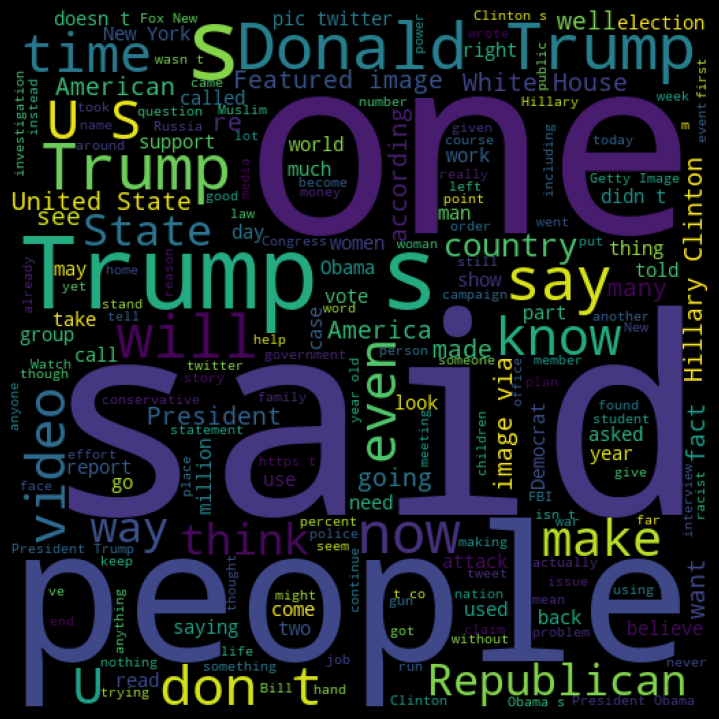

In [ ]:
real = ' '.join(list(messages[messages['category']==0]['text']))
real = WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

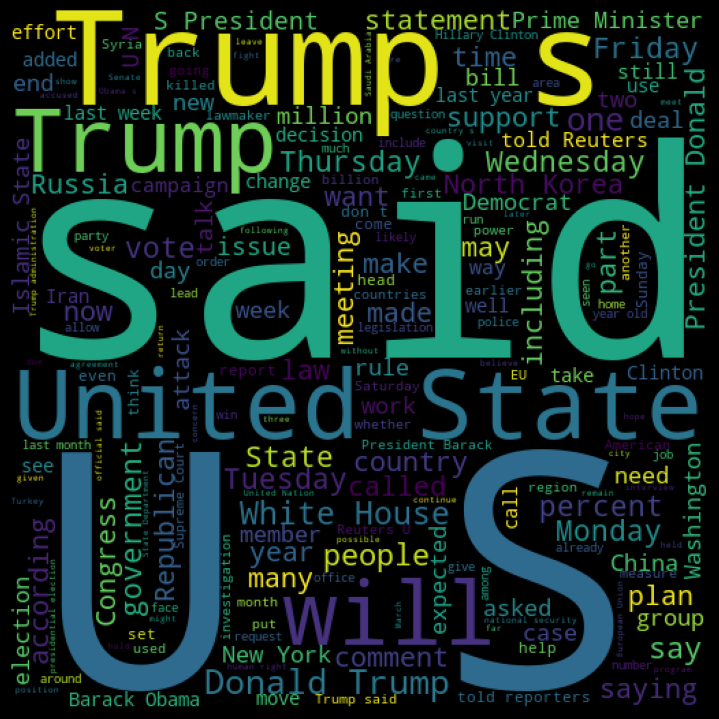

In [ ]:
fake = ' '.join(list(messages[messages['category']==1]['text']))
fake = WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

SPLITTING THE DATASET IN TEST AND TRANING SET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

In [ ]:
cv.get_feature_names_out()[:500]

array(['aaron', 'abadi', 'abandon', 'abba', 'abbott', 'abc', 'abc news',
       'abc week', 'abdel', 'abduct', 'abdullah', 'abe', 'abedin', 'abid',
       'abid by', 'abil', 'abl', 'abl get', 'aboard', 'abolish', 'abort',
       'abort and', 'abroad', 'abruptli', 'absenc', 'absent', 'absolut',
       'absolut no', 'absolut noth', 'absurd', 'abu', 'abus', 'abus and',
       'abus power', 'aca', 'academ', 'academi', 'acceler', 'accept',
       'access', 'accid', 'accident', 'accommod', 'accompani',
       'accompani by', 'accomplish', 'accord', 'accord court',
       'accord document', 'accord new', 'accord new york',
       'accord offici', 'accord polic', 'accord report', 'accord reuter',
       'accord reuter ipso', 'accord sourc', 'accord state',
       'accord statement', 'accord washington', 'accord with', 'account',
       'account and', 'account for', 'accur', 'accuraci', 'accus',
       'accus by', 'accus presid', 'accus sexual', 'accus trump',
       'achiev', 'acknowledg', 'ac

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 14000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [ ]:
count_df.head()

,aaron,abadi,abandon,abba,abbott,abc,abc news,abc week,abdel,abduct,...,zika,zika viru,zimbabw,zimbabwean,zink,zone,zone in,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


FUNCTION FOR PRINTS AND PLOTING OF CONFUSION MATRIX

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MultinomialNB Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

accuracy:   0.967
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8030
           1       0.96      0.97      0.97      7236

    accuracy                           0.97     15266
   macro avg       0.97      0.97      0.97     15266
weighted avg       0.97      0.97      0.97     15266

Confusion matrix, without normalization


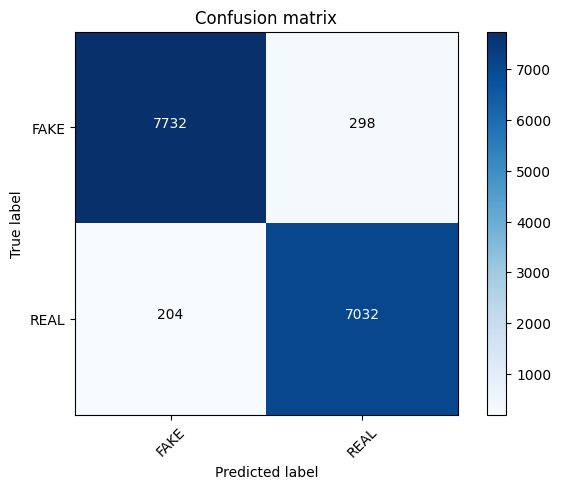

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
MultinomialNBModel = classifier.fit(X_train, y_train)
pred = MultinomialNBModel.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

accuracy:   0.960
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8030
           1       0.93      0.99      0.96      7236

    accuracy                           0.96     15266
   macro avg       0.96      0.96      0.96     15266
weighted avg       0.96      0.96      0.96     15266

Confusion matrix, without normalization


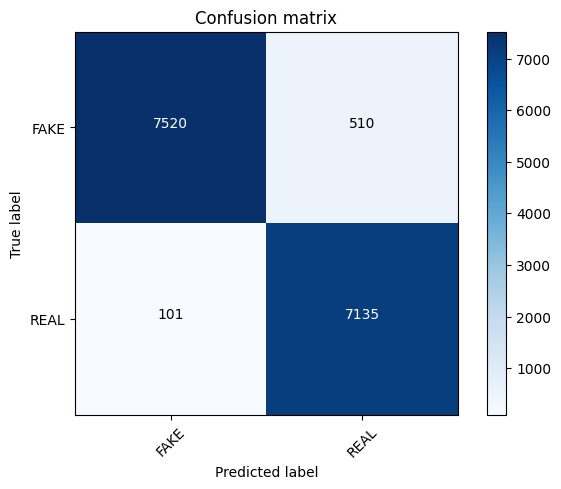

In [ ]:
from sklearn.metrics import classification_report
GaussianNBModel = classifier.fit(X_train, y_train)
pred = GaussianNBModel.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=10) 

Accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8030
           1       0.99      1.00      1.00      7236

    accuracy                           1.00     15266
   macro avg       1.00      1.00      1.00     15266
weighted avg       1.00      1.00      1.00     15266

Confusion matrix, without normalization


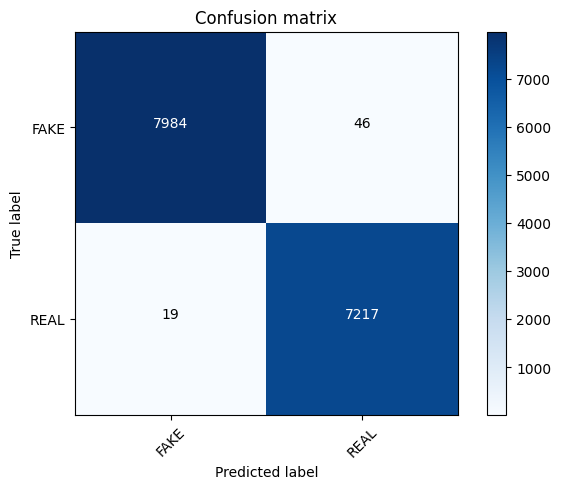

In [ ]:
from sklearn.metrics import classification_report
rf_model = classifier.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=10) 

Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8030
           1       1.00      1.00      1.00      7236

    accuracy                           1.00     15266
   macro avg       1.00      1.00      1.00     15266
weighted avg       1.00      1.00      1.00     15266

Confusion matrix, without normalization


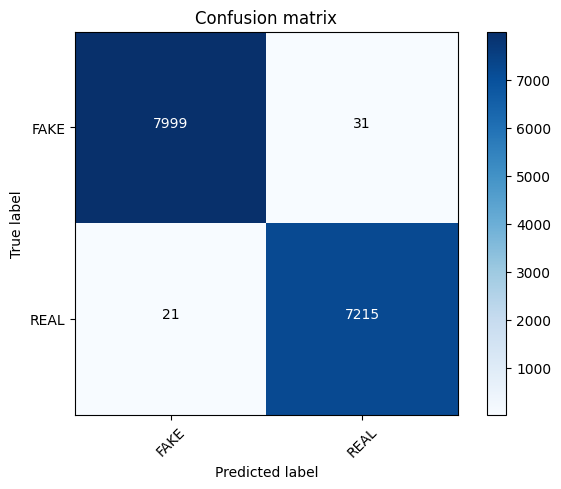

In [ ]:
from sklearn.metrics import classification_report
dt_model = classifier.fit(X_train, y_train)
pred = dt_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
import joblib

joblib.dump(rf_model, 'model.pkl')